In [1]:
import pandas as pd
import numpy as np

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("newDSshuffled.csv")
df

,GBA,Interest,University,Grad,Company
0,4,3,2,0,3
1,1,1,0,0,4
2,0,1,2,1,5
3,0,0,1,1,0
4,3,1,2,0,6
...,...,...,...,...,...
695,5,3,1,0,6
696,0,1,6,1,5
697,1,0,5,0,4
698,1,3,6,0,2


In [3]:
x = df.drop('Company', axis=1)
y = df['Company']
df.shape

(700, 5)

In [4]:
x.shape

(700, 4)

In [5]:
y.shape

(700,)

In [ ]:
x_encoded = pd.get_dummies(x, columns=['GBA', 'Interest', 'University', 'Grad'])
x = x_encoded
x.head()

In [ ]:
df22 = x
df22.to_csv('111.csv')

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2023)

In [7]:
knn_clf = KNeighborsClassifier()
svm_clf = svm.SVC()
gp_clf = GaussianProcessClassifier(1.0 * RBF(1.0))##
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
mlp_clf = MLPClassifier()
adab_clf = AdaBoostClassifier()###
gnb_clf = GaussianNB()###
qda_clf = QuadraticDiscriminantAnalysis()###

In [9]:
knn_param = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform','distance',None],
    'algorithm': ['auto','ball_tree','kd_tree','brute']
}
svm_param = {
    'C': [0.5, 1, 2, 5, 10, 50, 100],
    'kernel': ['linear','poly','rbf','sigmoid'],
    'degree': [2, 3, 4], 
    'gamma': ['scale', 'auto']
}
tree_param = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [10, 20, 40, 80, 100, None]
}
rf_param = {
    'n_estimators': [10, 50, 100, 500, 1000],
    'criterion': ['gini','entropy','log_loss']
}
mlp_param = {
    'activation': ['identity','logistic','tanh', 'relu'],
    'solver': ['lbfgs','sgd','adam'], 
    'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
}

In [10]:
GS_1 = GridSearchCV(estimator = knn_clf, param_grid = knn_param, scoring='accuracy', cv = 5, refit="accuracy")
GS_2 = GridSearchCV(estimator = svm_clf, param_grid = svm_param, scoring='accuracy', cv = 5, refit="accuracy")
GS_3 = GridSearchCV(estimator = tree_clf, param_grid = tree_param, scoring='accuracy', cv = 5, refit="accuracy")
GS_4 = GridSearchCV(estimator = rf_clf, param_grid = rf_param, scoring='accuracy', cv = 5, refit="accuracy")
GS_5 = GridSearchCV(estimator = mlp_clf, param_grid = mlp_param, scoring='accuracy', cv = 5, refit="accuracy")

In [11]:
GS_1.fit(x_train, y_train)
GS_2.fit(x_train, y_train)
GS_3.fit(x_train, y_train)
GS_4.fit(x_train, y_train)
GS_5.fit(x_train, y_train)
gp_clf = gp_clf.fit(x_train, y_train)
adab_clf = adab_clf.fit(x_train, y_train)
gnb_clf = gnb_clf.fit(x_train, y_train)
qda_clf = qda_clf.fit(x_train, y_train)

c:\Users\rashe\pyversions\py3102\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\rashe\pyversions\py3102\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\rashe\pyversions\py3102\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\rashe\pyversions\py3102\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\rashe\pyversions\py3102\lib\sit

In [12]:
print('KNN : ' + str(round(GS_1.best_score_ * 100, 2)) + ' ' + str(GS_1.best_params_))
print('SVM : ' + str(round(GS_2.best_score_ * 100, 2)) + ' ' + str(GS_2.best_params_))
print('tree: ' + str(round(GS_3.best_score_ * 100, 2)) + ' ' + str(GS_3.best_params_))
print('RF  : ' + str(round(GS_4.best_score_ * 100, 2)) + ' ' + str(GS_4.best_params_))
print('MLP : ' + str(round(GS_5.best_score_ * 100, 2)) + ' ' + str(GS_5.best_params_))
print(f'gp  : {round(accuracy_score(y_train, gp_clf.predict(x_train))*100, 2)}% {gp_clf}')
print(f'adab: {round(accuracy_score(y_train, adab_clf.predict(x_train))*100, 2)}% {adab_clf}')
print(f'gnb : {round(accuracy_score(y_train, gnb_clf.predict(x_train))*100, 2)}% {gnb_clf}')
print(f'qda : {round(accuracy_score(y_train, qda_clf.predict(x_train))*100, 2)}% {qda_clf}')

KNN : 65.51 {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}
SVM : 68.57 {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
tree: 67.35 {'criterion': 'gini', 'max_depth': 10}
RF  : 68.57 {'criterion': 'entropy', 'n_estimators': 10}
MLP : 68.37 {'activation': 'logistic', 'alpha': 0.1, 'solver': 'lbfgs'}
gp  : 70.41% GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))
adab: 66.12% AdaBoostClassifier()
gnb : 66.12% GaussianNB()
qda : 13.67% QuadraticDiscriminantAnalysis()


c:\Users\rashe\pyversions\py3102\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\rashe\pyversions\py3102\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\rashe\pyversions\py3102\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [13]:
knn_clf = KNeighborsClassifier(algorithm='auto', n_neighbors=11, weights='uniform')
svm_clf = svm.SVC(C=2, degree=2, gamma='auto', kernel='rbf')
gp_clf = GaussianProcessClassifier(1.0 * RBF(1.0))##
tree_clf = DecisionTreeClassifier(criterion='log_loss', max_depth=10)
rf_clf = RandomForestClassifier(criterion='entropy', n_estimators=500)
mlp_clf = MLPClassifier(activation='logistic', alpha=0.1, solver='adam')
adab_clf = AdaBoostClassifier()###
gnb_clf = GaussianNB()###
qda_clf = QuadraticDiscriminantAnalysis()###

clfs = [knn_clf, svm_clf, gp_clf, tree_clf, rf_clf, mlp_clf, adab_clf, gnb_clf, qda_clf]

In [14]:
train_res = []
test_res  = []

for clf in clfs:
    
    classifier = clf.fit(x_train, y_train)

    y_predict_test = classifier.predict(x_test)
    y_predict_train = classifier.predict(x_train)

    f = round(accuracy_score(y_train, y_predict_train)*100, 2)
    s = round(accuracy_score(y_test, y_predict_test)*100, 2)

    train_res.append(f)
    test_res.append(s)

c:\Users\rashe\pyversions\py3102\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\rashe\pyversions\py3102\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\rashe\pyversions\py3102\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\rashe\pyversions\py3102\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\rashe\pyversions\py3102\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
c:\Users\rashe\pyversions\py3102

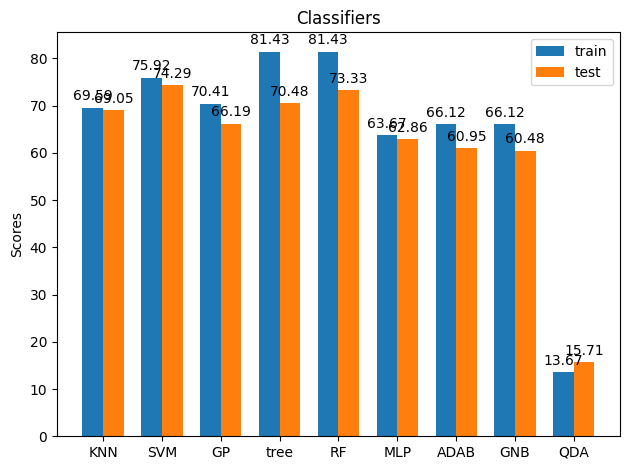

In [15]:
labels = ['KNN', 'SVM', 'GP', 'tree', 'RF', 'MLP', 'ADAB', 'GNB', 'QDA']

x_label = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x_label - width/2, train_res, width, label='train')
rects2 = ax.bar(x_label + width/2, test_res, width, label='test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Classifiers')
ax.set_xticks(x_label, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()